In [2]:
import pandas as pd
import numpy as np

### Overview
This dataset contains medical data used for predicting heart disease. The data includes various attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), and ST depression induced by exercise relative to rest (oldpeak).

### **Column Descriptions:**

1. **age**: 
   - **Description**: Age of the patient in years.
   - **Data Type**: Integer (`int64`)

2. **sex**:
   - **Description**: Sex of the patient.
     - `1` = Male
     - `0` = Female
   - **Data Type**: Integer (`int64`)

3. **cp**:
   - **Description**: Chest pain type, categorized into four types.
     - `1` = Typical Angina
     - `2` = Atypical Angina
     - `3` = Non-Anginal Pain
     - `4` = Asymptomatic
   - **Data Type**: Integer (`int64`)

4. **trestbps**:
   - **Description**: Resting blood pressure (in mm Hg) on admission to the hospital.
   - **Data Type**: Integer (`int64`)

5. **chol**:
   - **Description**: Serum cholesterol level (in mg/dl).
   - **Data Type**: Integer (`int64`)

6. **fbs**:
   - **Description**: Fasting blood sugar > 120 mg/dl.
     - `1` = True (Fasting blood sugar > 120 mg/dl)
     - `0` = False
   - **Data Type**: Integer (`int64`)

7. **restecg**:
   - **Description**: Resting electrocardiographic results.
     - `0` = Normal
     - `1` = Having ST-T wave abnormality
     - `2` = Showing probable or definite left ventricular hypertrophy
   - **Data Type**: Integer (`int64`)

8. **thalach**:
   - **Description**: Maximum heart rate achieved during exercise.
   - **Data Type**: Integer (`int64`)

9. **exang**:
   - **Description**: Exercise-induced angina.
     - `1` = Yes
     - `0` = No
   - **Data Type**: Integer (`int64`)

10. **oldpeak**:
    - **Description**: ST depression induced by exercise relative to rest (a measure of how much the ST segment is depressed during exercise compared to rest).
    - **Data Type**: Float (`float64`)

11. **slope**:
    - **Description**: Slope of the peak exercise ST segment.
      - `1` = Upsloping
      - `2` = Flat
      - `3` = Downsloping
    - **Data Type**: Integer (`int64`)

12. **ca**:
    - **Description**: Number of major vessels (0-3) colored by fluoroscopy.
    - **Data Type**: Integer (`int64`)

13. **thal**:
    - **Description**: Thalassemia (a blood disorder).
      - `1` = Normal
      - `2` = Fixed defect
      - `3` = Reversible defect
    - **Data Type**: Integer (`int64`)

14. **target**:
    - **Description**: Presence or absence of heart disease.
      - `1` = Presence
      - `0` = Absence
    - **Data Type**: Integer (`int64`)

In [3]:
df = pd.read_csv('heart-disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
df[features_to_convert] = df[features_to_convert].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


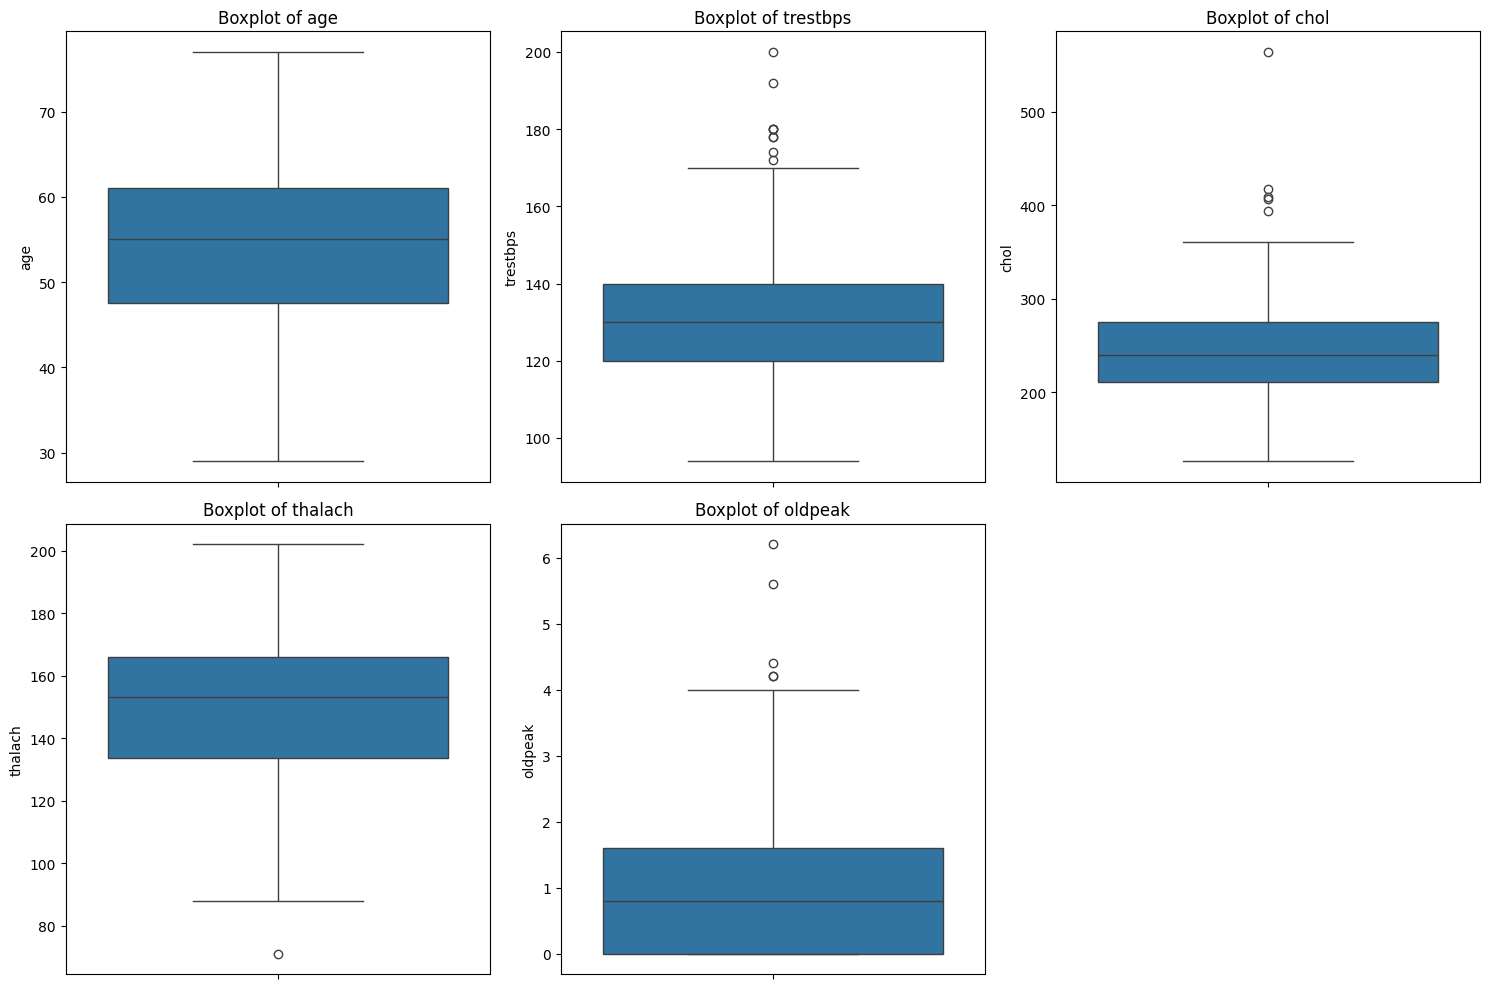

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [11]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
print("Number of outliers detected:")
print(outliers.sum())


Number of outliers detected:
age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64



### Columns Requiring One-Hot Encoding

One-hot encoding is typically applied to categorical variables with multiple categories where no ordinal relationship exists between the categories. In this dataset:

1. **cp (Chest Pain Type)**
   - Categories: 1 = Typical Angina, 2 = Atypical Angina, 3 = Non-Anginal Pain, 4 = Asymptomatic
   - Reason:  These categories represent different types of chest pain, but there's no inherent order among them. "Typical Angina" isn't more or less than "Atypical Angina," and "Non-Anginal Pain" isn't greater or lesser than "Asymptomatic." Since there's no natural ranking or progression among these types, we can't assign meaningful numerical values to them. One-hot encoding is appropriate because it will treat each chest pain type as a separate feature rather than implying any sort of ranking.

2. **restecg (Resting Electrocardiographic Results)**
   - Categories: 0 = Normal, 1 = Having ST-T wave abnormality, 2 = Showing probable or definite left ventricular hypertrophy
   - Reason: Although there is some medical interpretation in the values, for modeling purposes, these are distinct categories without a clear ordinal relationship, making them suitable for one-hot encoding.

3. **slope (Slope of the Peak Exercise ST Segment)**
   - Categories: 1 = Upsloping, 2 = Flat, 3 = Downsloping
   - Reason: The slope categories represent different types of ECG patterns, which can be treated as separate features in the model using one-hot encoding.

4. **thal (Thalassemia)**
   - Categories: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect
   - Reason: These categories describe different types of thalassemia conditions and should be treated as distinct categories through one-hot encoding.

### Columns That Do **Not** Require One-Hot Encoding

These columns can remain as integers, either because they are binary or continuous:

1. **age**: Continuous integer value, no need for one-hot encoding.
2. **sex**: Binary variable (0 = Female, 1 = Male); it can remain as is (some models might use it as a binary indicator).
3. **trestbps (Resting Blood Pressure)**: Continuous integer value, no need for one-hot encoding.
4. **chol (Serum Cholesterol Level)**: Continuous integer value, no need for one-hot encoding.
5. **fbs (Fasting Blood Sugar > 120 mg/dl)**: Binary variable (0 = False, 1 = True); can remain as is.
6. **thalach (Maximum Heart Rate Achieved)**: Continuous integer value, no need for one-hot encoding.
7. **exang (Exercise-Induced Angina)**: Binary variable (0 = No, 1 = Yes); can remain as is.
8. **oldpeak (ST Depression Induced by Exercise)**: Continuous float value, no need for one-hot encoding.
9. **ca (Number of Major Vessels Colored by Fluoroscopy)**: Discrete integer value, but it represents a count, not categories, so no need for one-hot encoding.
10. **target**: Binary target variable (0 = Absence, 1 = Presence of heart disease); this is the label and does not require one-hot encoding.

### Summary

- **One-Hot Encoding Required**: `cp`, `restecg`, `slope`, `thal`
- **No One-Hot Encoding Required**: `age`, `sex`, `trestbps`, `chol`, `fbs`, `thalach`, `exang`, `oldpeak`, `ca`, `target`

You can proceed with the preprocessing using one-hot encoding for the specified categorical features while leaving the others in their original formats.

In [12]:
df['sex'] = df['sex'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df['ca'] = df['ca'].astype(int)
df['target'] = df['target'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


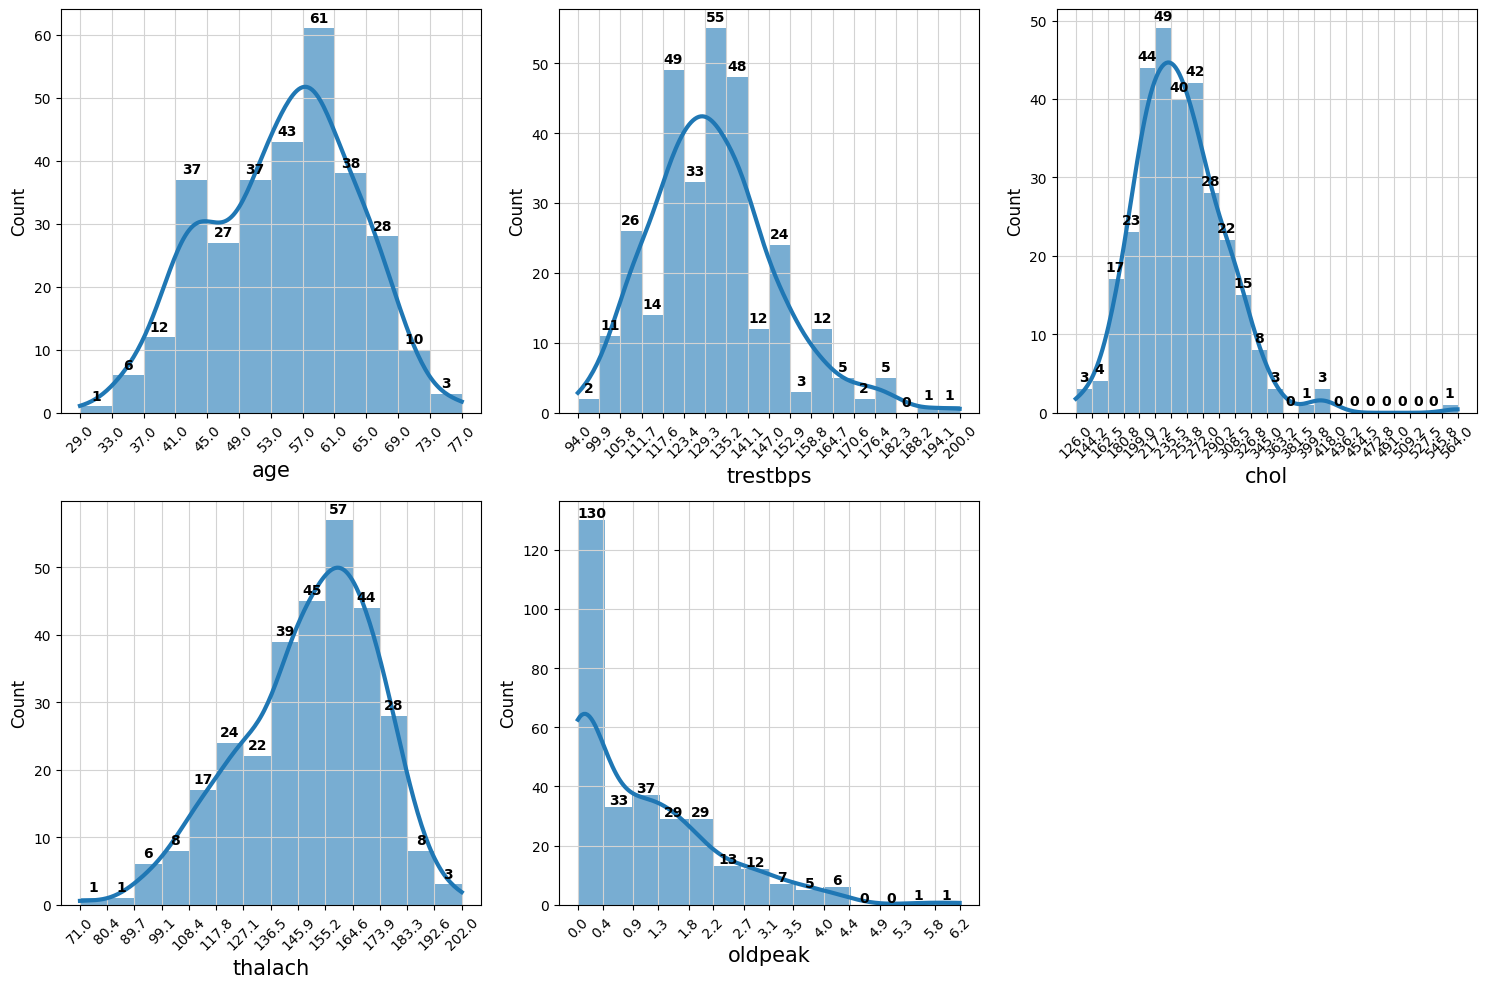

In [13]:
df_continuous = df[continuous_features].iloc[:, :5]

# subplot grid
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop
for i, col in enumerate(df_continuous.columns):
    x, y = divmod(i, 3)  # Determine subplot location
    values, bin_edges = np.histogram(df_continuous[col], bins='auto')
    
    sns.histplot(df_continuous[col], bins=bin_edges, kde=True, ax=ax[x, y], edgecolor='none', alpha=0.6, line_kws={'lw': 3})
    
    # Format 
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    # Annotate bars with counts
    for p in ax[x, y].patches:
        height = p.get_height()
        ax[x, y].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height + 1),
                          ha='center', fontsize=10, fontweight="bold")

# Remove unused subplots 1
for j in range(len(df_continuous.columns), 6): 
    fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show()

 ## explanation of each histogram:

1. **Age**:
   - The x-axis represents the age in years.
   - The y-axis represents the count of individuals.
   - The distribution appears to be somewhat bell-shaped, peaking around the 50-60 age range, indicating that most individuals in the dataset are in this age group.

2. **Trestbps** (Resting Blood Pressure):
   - The x-axis represents the resting blood pressure (in mm Hg).
   - The y-axis represents the count of individuals.
   - The distribution shows a peak around 120-140 mm Hg, indicating that most individuals have resting blood pressure within this range.

3. **Chol** (Serum Cholesterol):
   - The x-axis represents serum cholesterol in mg/dl.
   - The y-axis represents the count of individuals.
   - The distribution is right-skewed, with most values clustered around 200-250 mg/dl, but with a tail extending towards higher values.

4. **Thalach** (Maximum Heart Rate Achieved):
   - The x-axis represents the maximum heart rate achieved.
   - The y-axis represents the count of individuals.
   - The distribution peaks around 150 bpm, indicating that most individuals reached this heart rate during exercise.

5. **Oldpeak** (ST Depression Induced by Exercise Relative to Rest):
   - The x-axis represents the oldpeak value.
   - The y-axis represents the count of individuals.
   - The distribution is highly right-skewed, with the majority of individuals having a value close to 0, indicating minimal ST depression.


### Breakdown of the Parameters:

1. **`data=df`**:
   - This parameter specifies the dataset that you are using for the classification task. In this case, `df` is the DataFrame containing the data.

2. **`target='target'`**:
   - **Target Variable**: This is the name of the column in your DataFrame (`df`) that contains the labels you want to predict. Here, `target` is a binary variable indicating whether a patient has heart disease (1) or not (0).

3. **`normalize=True`**:
   - **Why Normalize?**: Normalization scales your features to ensure that they contribute equally to the model. Without normalization, features with larger ranges could dominate the model training process, leading to biased results.

4. **`normalize_method='robust'`**:
   - **What is Robust Normalization?**: Unlike standard normalization methods (e.g., min-max scaling), robust normalization is less sensitive to outliers. It scales the features using the interquartile range (IQR), which is the range between the 25th and 75th percentiles. This method is particularly useful when your data contains outliers that could skew the model if standard normalization were applied.

5. **`transformation=True`**:
   - **Why Transform?**: Transformations are applied to make the data more normally distributed. Many machine learning algorithms, especially linear models, perform better when the input data follows a normal distribution.

6. **`transformation_method='yeo-johnson'`**:
   - **What is the Yeo-Johnson Transformation?**: Yeo-Johnson is a power transformation technique that can handle both positive and negative data values, This transformation stabilizes variance and makes the data more normally distributed, improving the model's performance on non-normal data.
   - **Benefit for Classification**: By transforming the features, you can reduce skewness, manage outliers better, and make the data distribution more suitable for models that assume normality.

7. **`remove_outliers=False`**:
   - **Why Not Remove Outliers?**:  in a medical context where extreme values might indicate significant clinical conditions. By keeping the outliers and applying robust normalization and Yeo-Johnson transformation, you mitigate their impact without discarding potentially valuable data.

In [16]:
from pycaret.classification import *

exp = setup(data=df, 
        target='target', 
        normalize=True, 
        normalize_method='robust',
               transformation=True, 
        transformation_method='yeo-johnson', 
        remove_outliers=False,
             session_id=556, 
       )

,Description,Value
0,Session id,556
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 24)"
5,Transformed train set shape,"(212, 24)"
6,Transformed test set shape,"(91, 24)"
7,Numeric features,9
8,Categorical features,4
9,Preprocess,True



### Key Metrics:

1. **Accuracy**: Measures the percentage of correctly classified instances.
2. **AUC (Area Under the Curve)**: Measures the model's ability to distinguish between positive and negative classes. Higher AUC indicates better performance.
3. **Recall**: Measures the ability to correctly identify positive instances. High recall is important when you want to minimize false negatives.
4. **Precision**: Measures the ability to correctly identify only the relevant instances. High precision is important when you want to minimize false positives.
5. **F1 Score**: The harmonic mean of precision and recall. It balances the two metrics.
6. **Kappa**: Measures the agreement between the actual and predicted classifications, accounting for chance agreement.
7. **MCC (Matthews Correlation Coefficient)**: Provides a balanced measure of the quality of binary classifications, even with imbalanced classes.



In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8537,0.9064,0.8871,0.8591,0.8697,0.7014,0.7083,0.0380
lr,Logistic Regression,0.8489,0.9092,0.8871,0.8501,0.8657,0.6922,0.6984,0.0390
lda,Linear Discriminant Analysis,0.8489,0.9029,0.8871,0.8527,0.8661,0.6916,0.6994,0.0370
knn,K Neighbors Classifier,0.8351,0.8847,0.8606,0.8415,0.8487,0.6666,0.6714,0.0370
rf,Random Forest Classifier,0.8253,0.8949,0.8523,0.8389,0.8431,0.6438,0.6472,0.0940
et,Extra Trees Classifier,0.8162,0.8907,0.8545,0.8217,0.8340,0.6286,0.6360,0.0770
nb,Naive Bayes,0.8160,0.8445,0.9053,0.7999,0.8459,0.6187,0.6348,0.0360
lightgbm,Light Gradient Boosting Machine,0.8065,0.8632,0.8515,0.8119,0.8282,0.6042,0.6098,7.2630
ada,Ada Boost Classifier,0.7874,0.8283,0.8242,0.7891,0.8051,0.5695,0.5723,0.0560
gbc,Gradient Boosting Classifier,0.7734,0.8656,0.7818,0.8038,0.7879,0.5412,0.5466,0.0670


In [18]:
ridge_model = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.9167,0.8333,0.9091,0.8696,0.7273,0.7303
1,0.8636,0.9000,0.9167,0.8462,0.8800,0.7227,0.7258
2,0.9048,0.9630,0.9167,0.9167,0.9167,0.8056,0.8056
3,0.6667,0.6944,0.8333,0.6667,0.7407,0.2899,0.3043
4,0.9524,0.9444,0.9167,1.0000,0.9565,0.9041,0.9083
5,0.7619,0.8182,0.7273,0.8000,0.7619,0.5249,0.5273
6,0.9524,0.9818,0.9091,1.0000,0.9524,0.9050,0.9091
7,0.8571,0.9727,0.9091,0.8333,0.8696,0.7123,0.7156
8,0.8571,0.9545,1.0000,0.7857,0.8800,0.7097,0.7416


In [19]:
tuned_ridge = tune_model(ridge_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.9167,0.8333,0.9091,0.8696,0.7273,0.7303
1,0.8636,0.9000,0.9167,0.8462,0.8800,0.7227,0.7258
2,0.9048,0.9630,0.9167,0.9167,0.9167,0.8056,0.8056
3,0.7143,0.6944,0.9167,0.6875,0.7857,0.3824,0.4196
4,0.9524,0.9444,0.9167,1.0000,0.9565,0.9041,0.9083
5,0.7619,0.8182,0.7273,0.8000,0.7619,0.5249,0.5273
6,0.9524,0.9818,0.9091,1.0000,0.9524,0.9050,0.9091
7,0.8571,0.9636,0.9091,0.8333,0.8696,0.7123,0.7156
8,0.8571,0.9545,1.0000,0.7857,0.8800,0.7097,0.7416


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [20]:
custom_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']  # Different solvers
}
tuned_ridge_model = tune_model(ridge_model, custom_grid=custom_grid)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.9167,0.8333,0.9091,0.8696,0.7273,0.7303
1,0.8636,0.9000,0.9167,0.8462,0.8800,0.7227,0.7258
2,0.9048,0.9630,0.9167,0.9167,0.9167,0.8056,0.8056
3,0.6667,0.6944,0.8333,0.6667,0.7407,0.2899,0.3043
4,0.9524,0.9444,0.9167,1.0000,0.9565,0.9041,0.9083
5,0.7619,0.8182,0.7273,0.8000,0.7619,0.5249,0.5273
6,0.9524,0.9818,0.9091,1.0000,0.9524,0.9050,0.9091
7,0.8571,0.9727,0.9091,0.8333,0.8696,0.7123,0.7156
8,0.8571,0.9545,1.0000,0.7857,0.8800,0.7097,0.7416


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
print(tuned_ridge)

RidgeClassifier(alpha=1.76, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=556, solver='auto',
                tol=0.0001)


In [22]:
print(tuned_ridge_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=556, solver='auto',
                tol=0.0001)


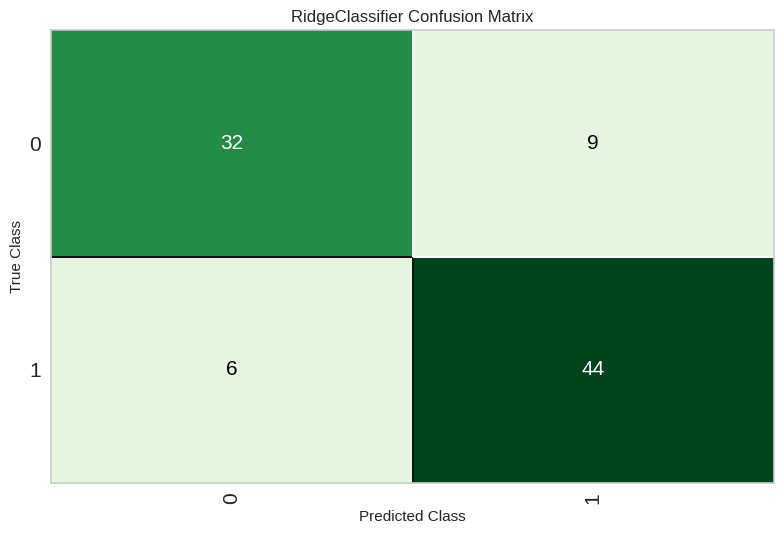

In [24]:
plot_model(tuned_ridge, plot='confusion_matrix')

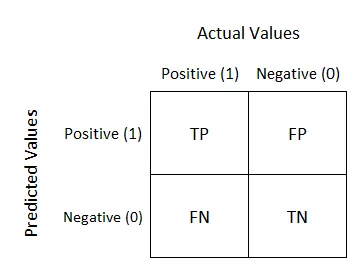

Key:

Term	Meaning	Descriptions
- TP	True Positive	Positive cases which are predicted as positive
- FP	False Positive	Negative cases which are predicted as positive
- TN	True Negative	Negative cases which are predicted as negative
- FN	False Negative	Positive casea which are predicted as negative



- **True Positives (TP) = 32:** 
  - These are cases where the model correctly predicted the presence of heart disease (1).
- **False Positives (FP) = 9:**
  - These are cases where the model incorrectly predicted the presence of heart disease (1) when it was actually absent (0).
- **False Negatives (FN) = 6:**
  - These are cases where the model incorrectly predicted the absence of heart disease (0) when it was actually present (1).
- **True Negatives (TN) = 44:**
  - These are cases where the model correctly predicted the absence of heart disease (0).

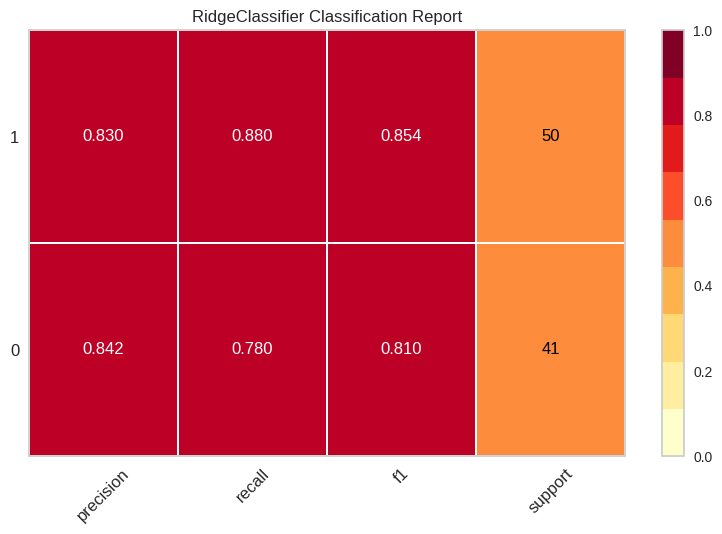

In [25]:
plot_model(tuned_ridge, plot='class_report')

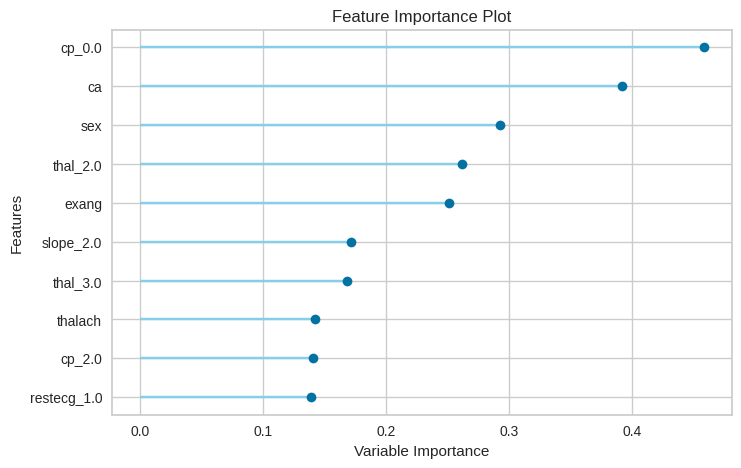

In [28]:
plot_model(tuned_ridge, plot='feature')


### **Interpretation:**

The Precision-Recall curve shows that the Ridge Classifier  model performs well in predicting heart disease, with a strong balance between precision and recall. The high average precision score of 0.93 further confirms that the model is effective in this classification task, making it reliable for identifying patients at risk of heart disease.

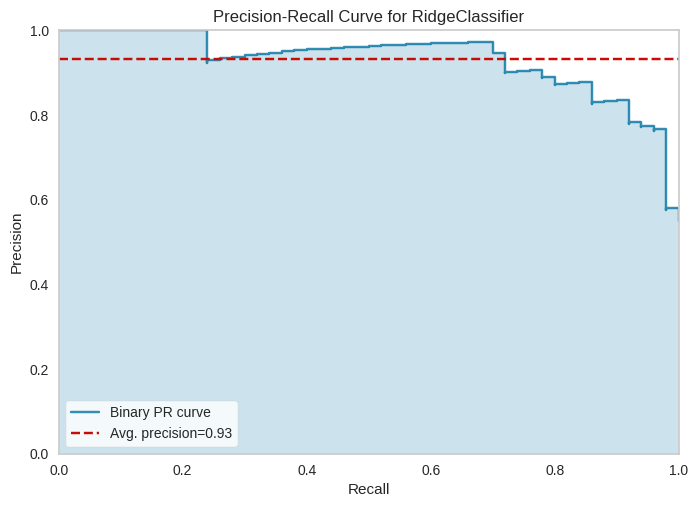

In [71]:
plot_model(tuned_ridge, plot='pr')


### **Learning Curve Summary:**

- **Training Score (Blue Line):** 
  - **Initial Performance:** Starts high (~0.90), indicating the model fits the training data well with fewer instances.
  - **Trend:** Decreases slightly as more data is added, stabilizing around 0.87 , suggesting the model avoids overfitting as it generalizes better with more data.

- **Cross-Validation Score (Green Line):**
  - **Initial Performance:** Lower than the training score, indicating potential overfitting when fewer instances are used.
  - **Trend:** Fluctuates initially but stabilizes around 0.84 as more data is used, showing improved generalization to unseen data.

- **Shaded Areas (Variability):**
  - **Initial Variability:** High for cross-validation scores, reflecting more variability in performance with smaller datasets.
  - **Trend:** Decreases as more data is used, indicating the model's performance becomes more consistent and reliable.


- The learning curve indicates that the Logistic Regression model is well-balanced, with the training and cross-validation scores converging as more data is added. The model is likely to generalize well to new data, with stable performance metrics. Adding more training data may not significantly improve performance further, as the scores have stabilized.

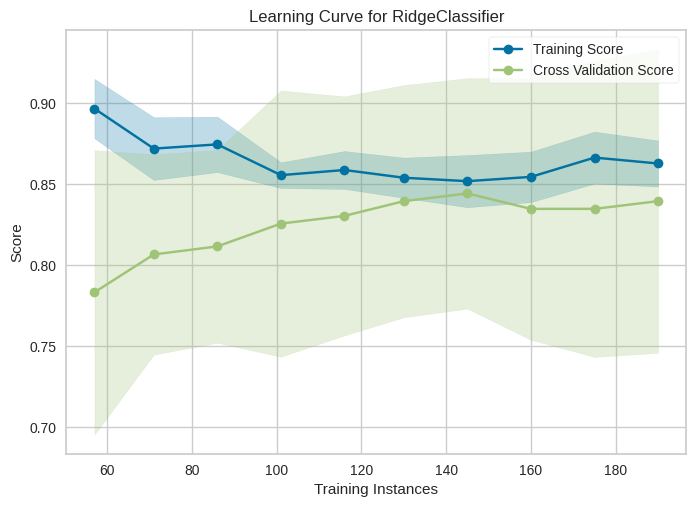

In [27]:
plot_model(tuned_ridge, plot='learning')


In [33]:
predictions=predict_model(tuned_ridge)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8352,0.8302,0.8800,0.8302,0.8544,0.6649,0.6664


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,0
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1,1


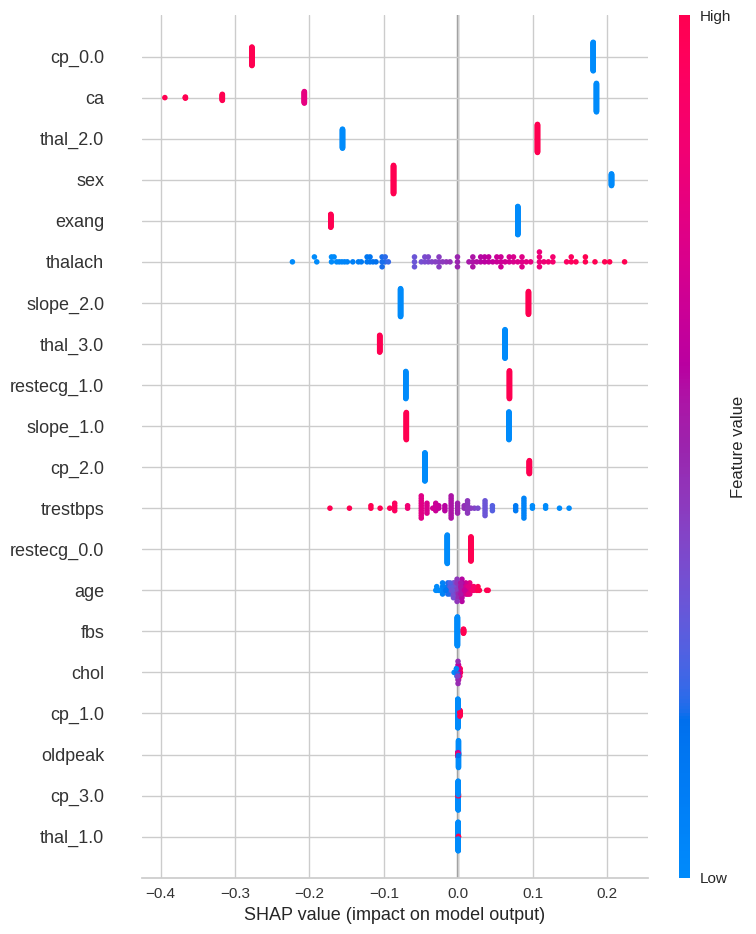

In [57]:
import shap
from pycaret.classification import get_config

# Retrieve the test data used in the PyCaret setup
X_test_transformed = get_config('X_test_transformed')

# Initialize the SHAP explainer
explainer = shap.LinearExplainer(tuned_ridge, X_test_transformed)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Create SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed)



In [73]:
import shap
shap.initjs()

from pycaret.classification import get_config

# Retrieve the transformed test data
X_test_transformed = get_config('X_test_transformed')

row_index = 4
row_data = X_test_transformed.iloc[[row_index]]

# Initialize the SHAP explainer 
explainer = shap.LinearExplainer(tuned_ridge, X_test_transformed)

# Calculate SHAP values
shap_values_for_row = explainer.shap_values(row_data)

# Visualize SHAP values 
shap.force_plot(explainer.expected_value, shap_values_for_row, row_data)



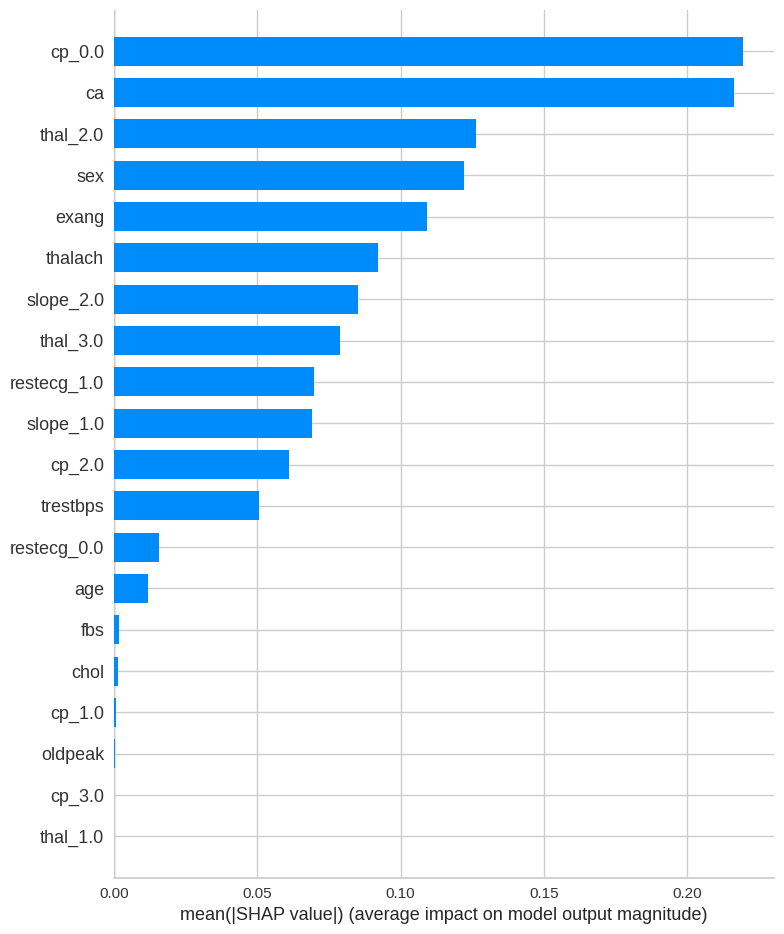

In [66]:
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar")


In [84]:
# ridge = create_model('ridge')
# lr = create_model('lr')
# lda = create_model('lda')

# # Blend the models
# blended_model = blend_models(estimator_list=[ridge, lr, lda])


In [85]:
# stacked_model = stack_models(estimator_list=[ridge, lr, lda], meta_model=ridge)
